# Titanic data

Part II : Learning Model
-------------------

In [3]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

#machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV

#Learning curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import validation_curve


# Essa não é uma boa pratica minha
# No futuro seria interessante removre para avaliar os avisos
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suprimir os avisos de convergência
warnings.filterwarnings("ignore", category=ConvergenceWarning)


%load_ext autoreload
%autoreload 2

import utils.learning_curve as curve

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
train_df = pd.read_csv('Results/Titanic_train_df.csv')
test_df = pd.read_csv('Results/Titanic_test_df.csv')

In [6]:
#------------------------------------------------------------------
# Step 03: Learning model
#------------------------------------------------------------------

X_data = train_df.drop("Survived", axis=1)          # data: Features
Y_data = train_df["Survived"]                       # data: Labels
X_test_kaggle  = test_df.drop("PassengerId", axis=1).copy() # test data (kaggle)

# Cria varios conjuntos de Treino e Teste
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

O `ShuffleSplit` é uma classe no módulo model_selection do scikit-learn que gera divisões aleatórias dos dados em conjuntos de treinamento e teste. 

`n_splits=100:` O número de divisões (ou splits) que serão criadas. Neste caso, 100 diferentes divisões serão geradas.

`test_size=0.2:` A proporção do conjunto de dados que será usada como conjunto de teste. Aqui, 20% dos dados serão reservados para o conjunto de teste em cada split.

`random_state=0: `Um valor de semente para o gerador de números aleatórios. Isso garante que os splits gerados sejam reprodutíveis; 
ou seja, se você executar o código novamente com o mesmo random_state, você obterá exatamente os mesmos splits.

O `ShuffleSplit` divide aleatoriamente os dados em conjuntos de treinamento e teste mantendo a proporção especificada. É particularmente útil quando você quer avaliar a performance de um modelo em várias divisões diferentes dos dados, para obter uma estimativa mais robusta da sua performance.

###  Logistic Regression

In [7]:
search_param = 1   # 1 -- grid search / 0 -- don't search
plot_vc      = 1   # 1--display validation curve/ 0-- don't display
plot_lc      = 1   # 1--display learning curve/ 0 -- don't display

In [8]:
#grid search: Logistic Regression
model = LogisticRegression()
if search_param==1:
    param_range = np.logspace(-6, 5, 12)
    param_grid = dict(C=param_range)
    curve.grid_search_model(X_data, Y_data, model, param_grid, cv)
# Best Score: 0.7914525139664803  / Best parameters: {'C': 10000.0}

Best Score: 0.7914525139664803  / Best parameters: {'C': 10000.0}


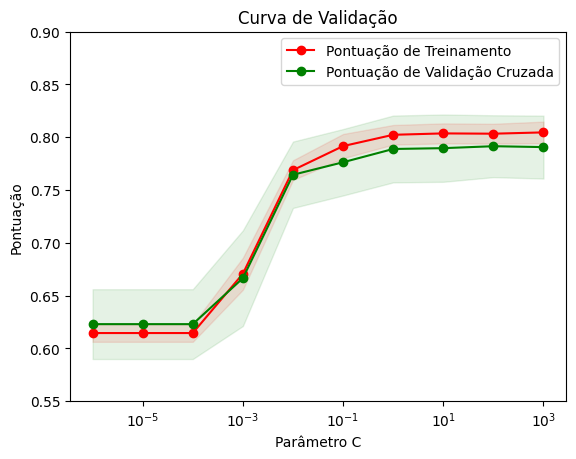

In [9]:
#Validation Curve: Logistic Regression
if plot_vc == 1:
    param_range = np.logspace(-6, 3, 10)
    param_name="C"
    ylim=[0.55, 0.9]
    curve.validation_curve_model(X_data, Y_data, model, "C", param_range, cv, ylim)

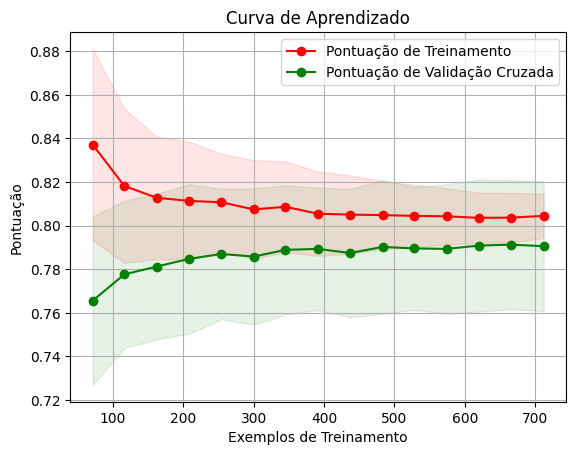

In [10]:
#learn curve
logreg  = LogisticRegression(C=1000)

if plot_lc==1:
    train_size=np.linspace(.1, 1.0, 15)
    curve.Learning_curve_model(X_data, Y_data, logreg, cv, train_size)

In [11]:
# Logistic Regression 
acc_log = curve.predict_model(
    X = X_data, 
    Y = Y_data, 
    model = logreg, 
    Xtest = X_test_kaggle, 
    test_df = test_df,
    cv = cv,
    submit_name = 'Results/Titanic_submission_Logistic.csv')

###  Support Vector Machines

In [12]:
search_param = 1   # 1 -- grid search / 0 -- don't search
plot_vc      = 1   # 1--display validation curve/ 0-- don't display
plot_lc      = 1   # 1--display learning curve/ 0 -- don't display

In [13]:
#grid search: SVM
if search_param==1:
    param_range = np.linspace(0.5, 5, 9)
    param_grid = dict(C=param_range)

    curve.grid_search_model(X_data, Y_data, SVC(), param_grid, cv)
# Best Score: 0.6229050279329609  / Best parameters: {'C': 0.5}

Best Score: 0.6229050279329609  / Best parameters: {'C': 0.5}


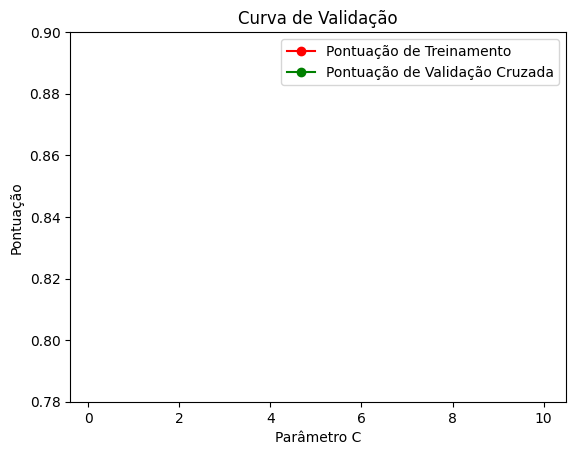

In [14]:
#Validation Curve: SVC
if plot_vc == 1:
    param_range = np.linspace(0.1, 10, 10)
    param_name="C"
    ylim=[0.78, 0.90]
    curve.validation_curve_model(X_data, Y_data, SVC(), "C", param_range, cv, ylim, log=False)

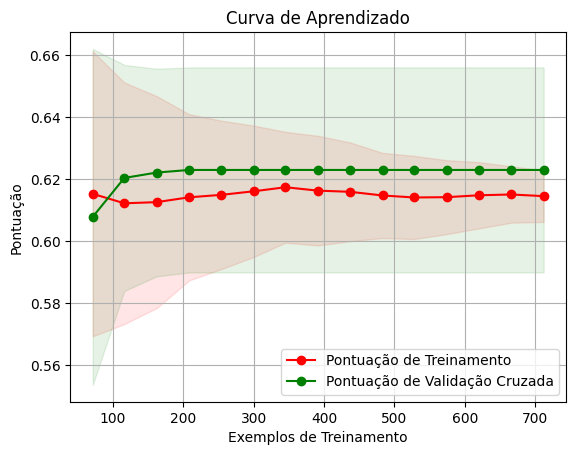

In [15]:
#learn curve: SVC
svc = SVC(C=1, probability=True)

if plot_lc == 1:
    train_size=np.linspace(.1, 1.0, 15)
    curve.Learning_curve_model(X_data, Y_data, svc, cv, train_size)

In [16]:
# Support Vector Machines
acc_svc = curve.predict_model(
    X = X_data, 
    Y = Y_data, 
    model = logreg, 
    Xtest = X_test_kaggle, 
    test_df = test_df,
    cv = cv,
    submit_name = 'Results/Titanic_submission_SVM.csv')

### KNN

In [17]:
search_param = 1   # 1 -- grid search / 0 -- don't search
plot_vc      = 1   # 1--display validation curve/ 0-- don't display
plot_lc      = 1   # 1--display learning curve/ 0 -- don't display

In [18]:
#grid search: KNN
if search_param==1:
    param_range = (np.linspace(1, 10, 10)).astype(int)
    param_grid = dict(n_neighbors=param_range)

    curve.grid_search_model(X_data, Y_data, KNeighborsClassifier(), param_grid, cv)
# Best Score: 0.6220670391061452  / Best parameters: {'n_neighbors': 2}

Best Score: 0.6220670391061452  / Best parameters: {'n_neighbors': 2}


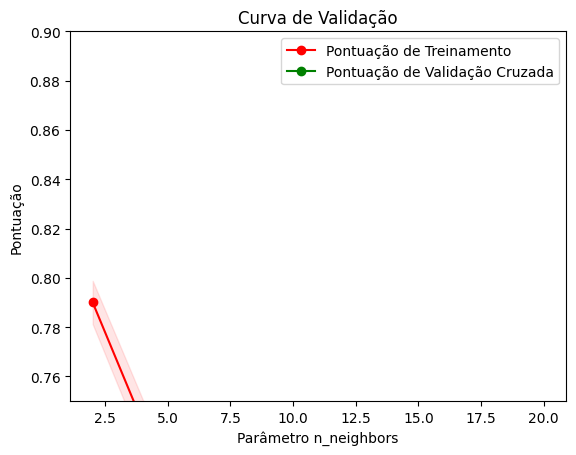

In [19]:
#Validation Curve: KNN
if plot_vc==1:
    param_range = np.linspace(2, 20, 10).astype(int)
    param_name="n_neighbors"
    ylim=[0.75, 0.90]
    curve.validation_curve_model(X_data, Y_data, KNeighborsClassifier(), "n_neighbors", param_range, cv, ylim, log=False)

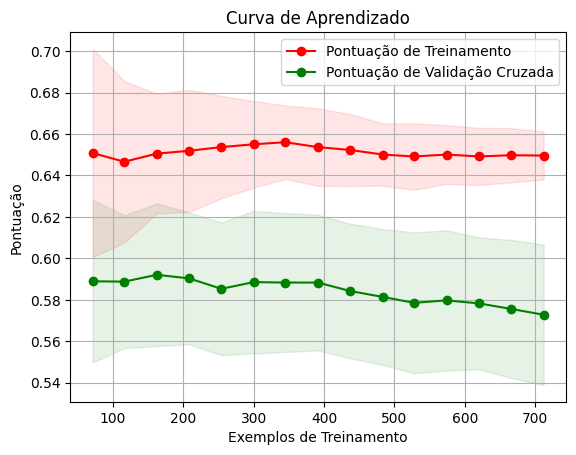

In [20]:
#learn curve: KNN
knn = KNeighborsClassifier(n_neighbors = 10)

if plot_lc==1:
    train_size=np.linspace(.1, 1.0, 15)
    curve.Learning_curve_model(X_data, Y_data, knn, cv, train_size)

In [21]:
# KNN
acc_knn = curve.predict_model(
    X = X_data, 
    Y = Y_data, 
    model = logreg, 
    Xtest = X_test_kaggle, 
    test_df = test_df,
    cv = cv,
    submit_name = 'Results/Titanic_submission_KNN.csv')

## Predictions List
- Naive Bayes
- Perceptron
- Linear SVC
- Stochastic Gradient Descent
- Decision Tree¶


In [22]:
# Lista de modelos e nomes de arquivo de submissão correspondentes
models = [
    (GaussianNB(), 'Gaussian_Naive_Bayes'),
    (Perceptron(), 'Perceptron'),
    (LinearSVC(), 'Linear_SVC'),
    (SGDClassifier(), 'Stochastic_Gradient_Descent'),
    (DecisionTreeClassifier(), 'Decision_Tree')
]

dic_acc = {}
# Iterar sobre os modelos
for model, filename in models:
    acc = curve.predict_model(
        X=X_data, 
        Y=Y_data, 
        model=model, 
        Xtest=X_test_kaggle, 
        test_df=test_df,
        cv=cv,
        submit_name=f'Results/Titanic_submission_{filename}.csv'
    )
    dic_acc[filename] = acc
    print(f'Accuracy for {filename}')


Accuracy for Gaussian_Naive_Bayes
Accuracy for Perceptron
Accuracy for Linear_SVC
Accuracy for Stochastic_Gradient_Descent
Accuracy for Decision_Tree


### Random Forest

In [23]:
search_param = 1   # 1 -- grid search / 0 -- don't search
plot_vc      = 1   # 1--display validation curve/ 0-- don't display
plot_lc      = 1   # 1--display learning curve/ 0 -- don't display

In [24]:
#grid search: KNN (This step is very slow)
param_range = (np.linspace(10, 110, 10)).astype(int)
param_leaf = (np.linspace(1, 2, 2)).astype(int)
param_grid = {'n_estimators':param_range, 'min_samples_leaf':param_leaf}

curve.grid_search_model(X_data, Y_data, RandomForestClassifier(), param_grid, cv)
# Best Score: 0.8232960893854746  / Best parameters: {'min_samples_leaf': 2, 'n_estimators': 10}

Best Score: 0.8232960893854746  / Best parameters: {'min_samples_leaf': 2, 'n_estimators': 10}


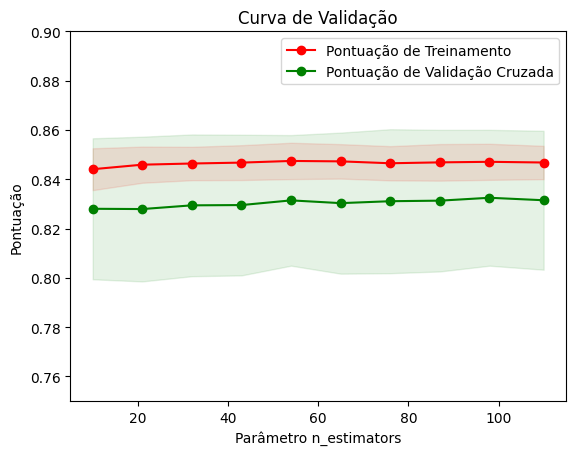

In [25]:
if plot_vc==1:
    param_range = np.linspace(10, 110, 10).astype(int)
    ylim=[0.75, 0.90]
    curve.validation_curve_model(X_data, Y_data, RandomForestClassifier(min_samples_leaf=12), "n_estimators", param_range, cv, ylim, log=False)

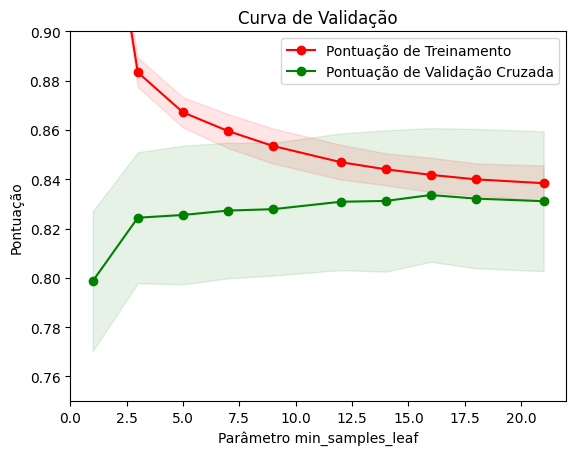

In [26]:
if plot_vc==1:
    param_range = np.linspace(1, 21, 10).astype(int)
    ylim=[0.75, 0.90]
    curve.validation_curve_model(X_data, Y_data, RandomForestClassifier(n_estimators=80), "min_samples_leaf", param_range, cv, ylim, log=False)

In [27]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=80, random_state =0, min_samples_leaf = 12)
acc_random_forest = curve.predict_model(
        X=X_data, 
        Y=Y_data, 
        model=model, 
        Xtest=X_test_kaggle, 
        test_df=test_df,
        cv=cv,
        submit_name=f'Results/Titanic_submission_random_forest.csv'
    )

### Ensemble votring

In [28]:
#ensemble votring
ensemble_voting = VotingClassifier(estimators=[('lg', logreg), ('sv', svc), ('rf', random_forest),('kn',knn)], voting='soft')
acc_ensemble_voting = curve.predict_model(
        X=X_data, 
        Y=Y_data, 
        model=model, 
        Xtest=X_test_kaggle, 
        test_df=test_df,
        cv=cv,
        submit_name=f'Results/Titanic_submission_ensemble_voting.csv'
    )

In [29]:
dic_acc.keys()

dict_keys(['Gaussian_Naive_Bayes', 'Perceptron', 'Linear_SVC', 'Stochastic_Gradient_Descent', 'Decision_Tree'])

In [30]:
acc_gaussian = dic_acc['Gaussian_Naive_Bayes']
acc_perceptron = dic_acc['Perceptron']
acc_sgd = dic_acc['Stochastic_Gradient_Descent']
acc_linear_svc = dic_acc['Linear_SVC']
acc_decision_tree = dic_acc['Decision_Tree']

In [31]:
models = pd.DataFrame(
    {
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression','Random Forest', 
              'Naive Bayes', 'Perceptron','Stochastic Gradient Decent', 'Linear SVC',
              'Decision Tree', 'ensemble_voting'],
    'KFoldScore': [acc_svc.mean(), acc_knn.mean(), acc_log.mean(), acc_random_forest.mean(), 
                acc_gaussian.mean(), acc_perceptron.mean(), acc_sgd.mean(), acc_linear_svc.mean(), 
                acc_decision_tree.mean(), acc_ensemble_voting.mean()],
    'Std': [acc_svc.std(), acc_knn.std(), acc_log.std(), acc_random_forest.std(), 
            acc_gaussian.std(), acc_perceptron.std(), acc_sgd.std(), acc_linear_svc.std(), 
            acc_decision_tree.std(), acc_ensemble_voting.std()]})

models.sort_values(by='KFoldScore', ascending=False)

,Model,KFoldScore,Std
7,Linear SVC,0.802961,0.029316
0,Support Vector Machines,0.790559,0.029808
1,KNN,0.790559,0.029808
2,Logistic Regression,0.790559,0.029808
8,Decision Tree,0.747486,0.036634
9,ensemble_voting,0.747486,0.035394
3,Random Forest,0.746927,0.036638
4,Naive Bayes,0.746816,0.032111
6,Stochastic Gradient Decent,0.562291,0.112604
5,Perceptron,0.542961,0.121304
